<img src='img/logo.png' width=200>

# Otkrivanje zakonitosti u podacima

## Projekat: Predviđanje svojstva zemljišta u Africi

In [41]:
import pandas as pd
import numpy as np
import sys

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.random.seed(1)
np.set_printoptions(formatter={'float_kind': lambda x: "%.3f" % x})

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import VarianceThreshold

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor

In [17]:
df = pd.read_csv('data/training.csv').set_index('PIDN')
print(f"Dimenzije trening skupa: {df.shape}")
df.head()

Dimenzije trening skupa: (1157, 3599)


,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,m7422.75,m7420.82,m7418.9,m7416.97,m7415.04,m7413.11,m7411.18,m7409.25,m7407.33,m7405.4,m7403.47,m7401.54,m7399.61,m7397.68,m7395.75,m7393.83,m7391.9,m7389.97,m7388.04,m7386.11,m7384.18,m7382.25,m7380.33,m7378.4,m7376.47,m7374.54,m7372.61,m7370.68,m7368.76,m7366.83,m7364.9,m7362.97,m7361.04,m7359.11,m7357.18,m7355.26,m7353.33,m7351.4,m7349.47,m7347.54,m7345.61,m7343.68,m7341.76,m7339.83,m7337.9,m7335.97,m7334.04,m7332.11,m7330.19,m7328.26,m7326.33,m7324.4,m7322.47,m7320.54,m7318.61,m7316.69,m7314.76,m7312.83,m7310.9,m7308.97,m7307.04,m7305.12,m7303.19,m7301.26,m7299.33,m7297.4,m7295.47,m7293.54,m7291.62,m7289.69,m7287.76,m7285.83,m7283.9,m7281.97,m7280.04,m7278.12,m7276.19,m7274.26,m7272.33,m7270.4,m7268.47,m7266.55,m7264.62,m7262.69,m7260.76,m7258.83,m7256.9,m7254.97,m7253.05,m7251.12,m7249.19,m7247.26,m7245.33,m7243.4,m7241.48,m7239.55,m7237.62,m7235.69,m7233.76,m7231.83,m7229.9,m7227.98,m7226.05,m7224.12,m7222.19,m7220.26,m7218.33,m7216.4,m7214.48,m7212.55,m7210.62,m7208.69,m7206.76,m7204.83,m7202.91,m7200.98,m7199.05,m7197.12,m7195.19,m7193.26,m7191.33,m7189.41,m7187.48,m7185.55,m7183.62,m7181.69,m7179.76,m7177.83,m7175.91,m7173.98,m7172.05,m7170.12,m7168.19,m7166.26,m7164.34,m7162.41,m7160.48,m7158.55,m7156.62,m7154.69,m7152.76,m7150.84,m7148.91,m7146.98,m7145.05,m7143.12,m7141.19,m7139.27,m7137.34,m7135.41,m7133.48,m7131.55,m7129.62,m7127.69,m7125.77,m7123.84,m7121.91,m7119.98,m7118.05,m7116.12,m7114.19,m7112.27,m7110.34,m7108.41,m7106.48,m7104.55,m7102.62,m7100.7,m7098.77,m7096.84,m7094.91,m7092.98,m7091.05,m7089.12,m7087.2,m7085.27,m7083.34,m7081.41,m7079.48,m7077.55,m7075.62,m7073.7,m7071.77,m7069.84,m7067.91,m7065.98,m7064.05,m7062.13,m7060.2,m7058.27,m7056.34,m7054.41,m7052.48,m7050.55,m7048.63,m7046.7,m7044.77,m7042.84,m7040.91,m7038.98,m7037.06,m7035.13,m7033.2,m7031.27,m7029.34,m7027.41,m7025.48,m7023.56,m7021.63,m7019.7,m7017.77,...,m1039.46,m1037.53,m1035.6,m1033.67,m1031.74,m1029.81,m1027.88,m1025.96,m1024.03,m1022.1,m1020.17,m1018.24,m1016.31,m1014.39,m1012.46,m1010.53,m1008.6,m1006.67,m1004.74,m1002.81,m1000.89,m998.957,m997.029,m995.1,m993.172,m991.243,m989.315,m987.386,m985.458,m983.529,m981.601,m979.672,m977.744,m975.815,m973.887,m971.958,m970.03,m968.101,m966.173,m964.244,m962.316,m960.387,m958.459,m956.53,m954.602,m952.673,m950.745,m948.816,m946.888,m944.959,m943.031,m941.102,m939.174,m937.246,m935.317,m933.389,m931.46,m929.532,m927.603,m925.675,m923.746,m921.818,m919.889,m917.961,m916.032,m914.104,m912.175,m910.247,m908.318,m906.39,m904.461,m902.533,m900.604,m898.676,m896.747,m894.819,m892.89,m890.962,m889.033,m887.105,m885.176,m883.248,m881.319,m879.391,m877.462,m875.534,m873.605,m871.677,m869.748,m867.82,m865.891,m863.963,m862.034,m860.106,m858.177,m856.249,m854.321,m852.392,m850.464,m848.535,m846.607,m844.678,m842.75,m840.821,m838.893,m836.964,m835.036,m833.107,m831.179,m829.25,m827.322,m825.393,m823.465,m821.536,m819.608,m817.679,m815.751,m813.822,m811.894,m809.965,m808.037,m806.108,m804.18,m802.251,m800.323,m798.394,m796.466,m794.537,m792.609,m790.68,m788.752,m786.823,m784.895,m782.966,m781.038,m779.109,m777.181,m775.252,m773.324,m771.395,m769.467,m767.539,m765.61,m763.682,m761.753,m759.825,m757.896,m755.968,m754.039,m752.111,m750.182,m748.254,m746.325,m744.397,m742.468,m740.54,m738.611,m736.683,m734.754,m732.826,m730.897,m728.969,m727.04,m725.112,m723.183,m721.255,m719.326,m717.398,m715.469,m713.541,m711.612,m709.684,m707.755,m705.827,m703.898,m701.97,m700.041,m698.113,m696.184,m694.256,m692.327,m690.399,m688.47,m686.542,m684.614,m682.685,m680.757,m678.828,m676.9,m674.971,m673.043,m671.114,m669.186,m667.257,m665.329,m663.4,m661.472,m659.543,m657.615,m6

### Opis i razumevanje problema i podataka

In [18]:
df.describe()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,m7422.75,m7420.82,m7418.9,m7416.97,m7415.04,m7413.11,m7411.18,m7409.25,m7407.33,m7405.4,m7403.47,m7401.54,m7399.61,m7397.68,m7395.75,m7393.83,m7391.9,m7389.97,m7388.04,m7386.11,m7384.18,m7382.25,m7380.33,m7378.4,m7376.47,m7374.54,m7372.61,m7370.68,m7368.76,m7366.83,m7364.9,m7362.97,m7361.04,m7359.11,m7357.18,m7355.26,m7353.33,m7351.4,m7349.47,m7347.54,m7345.61,m7343.68,m7341.76,m7339.83,m7337.9,m7335.97,m7334.04,m7332.11,m7330.19,m7328.26,m7326.33,m7324.4,m7322.47,m7320.54,m7318.61,m7316.69,m7314.76,m7312.83,m7310.9,m7308.97,m7307.04,m7305.12,m7303.19,m7301.26,m7299.33,m7297.4,m7295.47,m7293.54,m7291.62,m7289.69,m7287.76,m7285.83,m7283.9,m7281.97,m7280.04,m7278.12,m7276.19,m7274.26,m7272.33,m7270.4,m7268.47,m7266.55,m7264.62,m7262.69,m7260.76,m7258.83,m7256.9,m7254.97,m7253.05,m7251.12,m7249.19,m7247.26,m7245.33,m7243.4,m7241.48,m7239.55,m7237.62,m7235.69,m7233.76,m7231.83,m7229.9,m7227.98,m7226.05,m7224.12,m7222.19,m7220.26,m7218.33,m7216.4,m7214.48,m7212.55,m7210.62,m7208.69,m7206.76,m7204.83,m7202.91,m7200.98,m7199.05,m7197.12,m7195.19,m7193.26,m7191.33,m7189.41,m7187.48,m7185.55,m7183.62,m7181.69,m7179.76,m7177.83,m7175.91,m7173.98,m7172.05,m7170.12,m7168.19,m7166.26,m7164.34,m7162.41,m7160.48,m7158.55,m7156.62,m7154.69,m7152.76,m7150.84,m7148.91,m7146.98,m7145.05,m7143.12,m7141.19,m7139.27,m7137.34,m7135.41,m7133.48,m7131.55,m7129.62,m7127.69,m7125.77,m7123.84,m7121.91,m7119.98,m7118.05,m7116.12,m7114.19,m7112.27,m7110.34,m7108.41,m7106.48,m7104.55,m7102.62,m7100.7,m7098.77,m7096.84,m7094.91,m7092.98,m7091.05,m7089.12,m7087.2,m7085.27,m7083.34,m7081.41,m7079.48,m7077.55,m7075.62,m7073.7,m7071.77,m7069.84,m7067.91,m7065.98,m7064.05,m7062.13,m7060.2,m7058.27,m7056.34,m7054.41,m7052.48,m7050.55,m7048.63,m7046.7,m7044.77,m7042.84,m7040.91,m7038.98,m7037.06,m7035.13,m7033.2,m7031.27,m7029.34,m7027.41,m7025.48,m7023.56,m7021.63,m7019.7,m7017.77,...,m1041.38,m1039.46,m1037.53,m1035.6,m1033.67,m1031.74,m1029.81,m1027.88,m1025.96,m1024.03,m1022.1,m1020.17,m1018.24,m1016.31,m1014.39,m1012.46,m1010.53,m1008.6,m1006.67,m1004.74,m1002.81,m1000.89,m998.957,m997.029,m995.1,m993.172,m991.243,m989.315,m987.386,m985.458,m983.529,m981.601,m979.672,m977.744,m975.815,m973.887,m971.958,m970.03,m968.101,m966.173,m964.244,m962.316,m960.387,m958.459,m956.53,m954.602,m952.673,m950.745,m948.816,m946.888,m944.959,m943.031,m941.102,m939.174,m937.246,m935.317,m933.389,m931.46,m929.532,m927.603,m925.675,m923.746,m921.818,m919.889,m917.961,m916.032,m914.104,m912.175,m910.247,m908.318,m906.39,m904.461,m902.533,m900.604,m898.676,m896.747,m894.819,m892.89,m890.962,m889.033,m887.105,m885.176,m883.248,m881.319,m879.391,m877.462,m875.534,m873.605,m871.677,m869.748,m867.82,m865.891,m863.963,m862.034,m860.106,m858.177,m856.249,m854.321,m852.392,m850.464,m848.535,m846.607,m844.678,m842.75,m840.821,m838.893,m836.964,m835.036,m833.107,m831.179,m829.25,m827.322,m825.393,m823.465,m821.536,m819.608,m817.679,m815.751,m813.822,m811.894,m809.965,m808.037,m806.108,m804.18,m802.251,m800.323,m798.394,m796.466,m794.537,m792.609,m790.68,m788.752,m786.823,m784.895,m782.966,m781.038,m779.109,m777.181,m775.252,m773.324,m771.395,m769.467,m767.539,m765.61,m763.682,m761.753,m759.825,m757.896,m755.968,m754.039,m752.111,m750.182,m748.254,m746.325,m744.397,m742.468,m740.54,m738.611,m736.683,m734.754,m732.826,m730.897,m728.969,m727.04,m725.112,m723.183,m721.255,m719.326,m717.398,m715.469,m713.541,m711.612,m709.684,m707.755,m705.827,m703.898,m701.97,m700.041,m698.113,m696.184,m694.256,m692.327,m690.399,m688.47,m686.542,m684.614,m682.685,m680.757,m678.828,m676.9,m674.971,m673.043,m671.114,m669.186,m667.257,m665.329,m663.4,m661.472,m659.543,m6

In [19]:
df.Depth = df.Depth.replace({'Subsoil': 0, 'Topsoil': 1})

In [20]:
df.dtypes

m7497.96    float64
m7496.04    float64
m7494.11    float64
m7492.18    float64
m7490.25    float64
m7488.32    float64
m7486.39    float64
m7484.46    float64
m7482.54    float64
m7480.61    float64
m7478.68    float64
m7476.75    float64
m7474.82    float64
m7472.89    float64
m7470.97    float64
m7469.04    float64
m7467.11    float64
m7465.18    float64
m7463.25    float64
m7461.32    float64
m7459.39    float64
m7457.47    float64
m7455.54    float64
m7453.61    float64
m7451.68    float64
m7449.75    float64
m7447.82    float64
m7445.89    float64
m7443.97    float64
m7442.04    float64
m7440.11    float64
m7438.18    float64
m7436.25    float64
m7434.32    float64
m7432.4     float64
m7430.47    float64
m7428.54    float64
m7426.61    float64
m7424.68    float64
m7422.75    float64
m7420.82    float64
m7418.9     float64
m7416.97    float64
m7415.04    float64
m7413.11    float64
m7411.18    float64
m7409.25    float64
m7407.33    float64
m7405.4     float64
m7403.47    float64


In [6]:
df.isnull().sum().sum()

0

Skup sa kojim radimo ima jednu binarnu varijablu i ostale numeričke. Ne sadrži nedostajuće podatke.

U pitanju je visokodimenzionalni skup sa 3599 observacija. Ukupno je 1157 atributa, a ciljni atirbuti su:
- SOC - količina organskog uglja u tlu (Soil Organic Carbon),
- pH - vrednost kiselosti zemljišta,  
- Ca - količina kalcijuma koja se može ekstraktovati Mehich-3 ekstrakcijom,
- P - količina fosfora koja se može ekstraktovati Mehich-3 ekstrakcijom, i 
- Sand - količina peska


In [5]:
target_columns = ['Ca', "P", "pH", "SOC", "Sand"]
measured_columns = ['Depth']
spatial_columns = [x for x in list(df.columns) if x not in (target_columns+measured_columns) and not x.startswith('m')]
absorbance_measured_columns = [x for x in list(df.columns) if x not in target_columns and x.startswith('m')]
print(f"Ciljni atributi: {len(target_columns)}. Prostorni atributi: {len(spatial_columns)}. Izmereni atributi: {len(measured_columns)}. Atributi o izmerenoj apsorpciji zračenja: {len(absorbance_measured_columns)}.")

Ciljni atributi: 5. Prostorni atributi: 15. Izmereni atributi: 1. Atributi o izmerenoj apsorpciji zračenja: 3578.


U prostoru atributa prediktora nalaze se dva grupe atributa:
- izmerene karakteristike zemljišta:
    - Depth - jedini kategorički atribut, binarni. Označava da li je uzorak uzet iz površinskog ili podzemnog sloja zemlje. Prebačen je u numerički sledećim mapiranjem: 'Subsoil': 0, 'Topsoil': 1.
    - m7497.96 - m599.76 - mere upijanja infracrvenog zračenja talasnog broja od 7497.96 do 599.76. Preporuka izvora je da se ukloni spektar CO2 m2379.76-m2352.76. Potrebno je testirati  **Hipotezu 1**:  Uklanjanje spektra m2379.76-m2352.76 neće smanjiti tačnost modela.
- prostorni atributi: 
   - BSA - blizina infracrvenog svetla
   - CTI - topografski indeks izračunat iz nadmorske visine
   - ELEV - nadmorska visina radarske topografije
   - EVI - prosek poboljšanja vegetacionog indeksa
   - LST - prosečne temerature kopna: LSTD za dnevnu, LSTN za noćnu
   - Ref - prosek refleksije kopna (Ref1=plava, Ref2=crvena, Ref3=blizu infra-crvenom, Ref7=infra-crveno)
   - Reli - topografski reljef
   - TMAP i TMFI - pokazatelji praćenja tropskih šuma (TMAP=srednja godišnja količina padavina i TMFI=modifikovani Fournier indeks)
   
Svi prostorni atributi su skalirani, dok se izmereni karakteristike nalaze na skali (-0.068, 2.569) i, iako mereni na istoj skali, moguće je da bi njihovo skaliranje pomoglo tačnosti, pa je potebno testirati **Hipotezu 2**: Skaliranje atributa će imati uticaj na poboljšanje algoritma. 




In [6]:
spatial_df = df[spatial_columns]
# spatial_profile = ProfileReport(spatial_profile)
# profile.to_file("results/spatial_report.html")

In [7]:
spatial_df.describe()

,BSAN,BSAS,BSAV,CTI,ELEV,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,-0.572226,-0.623242,-0.691976,-0.213203,0.533953,0.698859,-0.413636,-0.092569,-0.698528,-0.506340,-0.661642,-0.638464,0.276786,0.563194,0.746303
std,0.235748,0.239737,0.281652,0.661576,1.396132,0.683280,0.686773,0.861165,0.272107,0.329785,0.365572,0.326460,1.074667,0.649622,0.825242
min,-1.007246,-0.972727,-1.175812,-0.945472,-1.326726,-0.881924,-1.906958,-2.720276,-1.127273,-1.642857,-1.265010,-1.115423,-0.639823,-0.670742,-0.862741
25%,-0.739130,-0.781818,-0.895857,-0.548063,-0.812249,0.199708,-0.906601,-0.622874,-0.900364,-0.753247,-0.917184,-0.881048,-0.452939,0.190708,0.056843
50%,-0.608696,-0.681818,-0.761478,-0.344714,0.867038,0.659621,-0.476813,-0.019511,-0.754182,-0.531540,-0.753623,-0.740423,-0.130139,0.316667,0.729111
75%,-0.463768,-0.563636,-0.604703,-0.104917,1.292428,1.129738,0.080083,0.631670,-0.594909,-0.269944,-0.445135,-0.432460,0.532450,0.955935,1.414215
max,0.217391,0.200000,0.223964,3.596526,4.891537,2.645044,1.320112,1.519218,0.285818,0.335807,0.366460,0.290323,5.612300,2.161892,2.976315


Iako se u opisu podataka navodi da su prostorni podaci skalirani oko centra, vidimo da bi svođenje na istu skalu moglo da ima uticaja. Kod većine atributa postoje značajne razlike percentila od mina i maxa, pa je moguće da neke kolone sadrže izuzetke. Pored navedenih, potrebno je testirati **Hipotezu 3**: Uklanjanje izuzetaka može pomoći izgradnji tačnijeg modela.

In [6]:
m_df = df[absorbance_measured_columns]
m_df.describe()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,m7478.68,m7476.75,m7474.82,m7472.89,m7470.97,m7469.04,m7467.11,m7465.18,m7463.25,m7461.32,m7459.39,m7457.47,m7455.54,m7453.61,m7451.68,m7449.75,m7447.82,m7445.89,m7443.97,m7442.04,m7440.11,m7438.18,m7436.25,m7434.32,m7432.4,m7430.47,m7428.54,m7426.61,m7424.68,m7422.75,m7420.82,m7418.9,m7416.97,m7415.04,m7413.11,m7411.18,m7409.25,m7407.33,m7405.4,m7403.47,m7401.54,m7399.61,m7397.68,m7395.75,m7393.83,m7391.9,m7389.97,m7388.04,m7386.11,m7384.18,m7382.25,m7380.33,m7378.4,m7376.47,m7374.54,m7372.61,m7370.68,m7368.76,m7366.83,m7364.9,m7362.97,m7361.04,m7359.11,m7357.18,m7355.26,m7353.33,m7351.4,m7349.47,m7347.54,m7345.61,m7343.68,m7341.76,m7339.83,m7337.9,m7335.97,m7334.04,m7332.11,m7330.19,m7328.26,m7326.33,m7324.4,m7322.47,m7320.54,m7318.61,m7316.69,m7314.76,m7312.83,m7310.9,m7308.97,m7307.04,m7305.12,m7303.19,m7301.26,m7299.33,m7297.4,m7295.47,m7293.54,m7291.62,m7289.69,m7287.76,m7285.83,m7283.9,m7281.97,m7280.04,m7278.12,m7276.19,m7274.26,m7272.33,m7270.4,m7268.47,m7266.55,m7264.62,m7262.69,m7260.76,m7258.83,m7256.9,m7254.97,m7253.05,m7251.12,m7249.19,m7247.26,m7245.33,m7243.4,m7241.48,m7239.55,m7237.62,m7235.69,m7233.76,m7231.83,m7229.9,m7227.98,m7226.05,m7224.12,m7222.19,m7220.26,m7218.33,m7216.4,m7214.48,m7212.55,m7210.62,m7208.69,m7206.76,m7204.83,m7202.91,m7200.98,m7199.05,m7197.12,m7195.19,m7193.26,m7191.33,m7189.41,m7187.48,m7185.55,m7183.62,m7181.69,m7179.76,m7177.83,m7175.91,m7173.98,m7172.05,m7170.12,m7168.19,m7166.26,m7164.34,m7162.41,m7160.48,m7158.55,m7156.62,m7154.69,m7152.76,m7150.84,m7148.91,m7146.98,m7145.05,m7143.12,m7141.19,m7139.27,m7137.34,m7135.41,m7133.48,m7131.55,m7129.62,m7127.69,m7125.77,m7123.84,m7121.91,m7119.98,m7118.05,m7116.12,m7114.19,m7112.27,m7110.34,m7108.41,m7106.48,m7104.55,m7102.62,m7100.7,m7098.77,m7096.84,m7094.91,m7092.98,m7091.05,m7089.12,m7087.2,m7085.27,m7083.34,m7081.41,m7079.48,m7077.55,m7075.62,m7073.7,m7071.77,m7069.84,m7067.91,m7065.98,m7064.05,m7062.13,m7060.2,m7058.27,m7056.34,m7054.41,m7052.48,m7050.55,m7048.63,m7046.7,m7044.77,m7042.84,m7040.91,m7038.98,m7037.06,m7035.13,m7033.2,m7031.27,m7029.34,m7027.41,m7025.48,m7023.56,m7021.63,m7019.7,m7017.77,...,m1079.95,m1078.03,m1076.1,m1074.17,m1072.24,m1070.31,m1068.38,m1066.45,m1064.53,m1062.6,m1060.67,m1058.74,m1056.81,m1054.88,m1052.95,m1051.03,m1049.1,m1047.17,m1045.24,m1043.31,m1041.38,m1039.46,m1037.53,m1035.6,m1033.67,m1031.74,m1029.81,m1027.88,m1025.96,m1024.03,m1022.1,m1020.17,m1018.24,m1016.31,m1014.39,m1012.46,m1010.53,m1008.6,m1006.67,m1004.74,m1002.81,m1000.89,m998.957,m997.029,m995.1,m993.172,m991.243,m989.315,m987.386,m985.458,m983.529,m981.601,m979.672,m977.744,m975.815,m973.887,m971.958,m970.03,m968.101,m966.173,m964.244,m962.316,m960.387,m958.459,m956.53,m954.602,m952.673,m950.745,m948.816,m946.888,m944.959,m943.031,m941.102,m939.174,m937.246,m935.317,m933.389,m931.46,m929.532,m927.603,m925.675,m923.746,m921.818,m919.889,m917.961,m916.032,m914.104,m912.175,m910.247,m908.318,m906.39,m904.461,m902.533,m900.604,m898.676,m896.747,m894.819,m892.89,m890.962,m889.033,m887.105,m885.176,m883.248,m881.319,m879.391,m877.462,m875.534,m873.605,m871.677,m869.748,m867.82,m865.891,m863.963,m862.034,m860.106,m858.177,m856.249,m854.321,m852.392,m850.464,m848.535,m846.607,m844.678,m842.75,m840.821,m838.893,m836.964,m835.036,m833.107,m831.179,m829.25,m827.322,m825.393,m823.465,m821.536,m819.608,m817.679,m815.751,m813.822,m811.894,m809.965,m808.037,m806.108,m804.18,m802.251,m800.323,m798.394,m796.466,m794.537,m792.609,m790.68,m788.752,m786.823,m784.895,m782.966,m781.038,m779.109,m777.181,m775.252,m773.324,m771.395,m769.467,m767.539,m765.61,m763.682,m761.753,m759.825,m757.896,m755.968,m754.039,m752.111,m750.182,m748.254,m746.325,m744.397,m742.468,m740.54,m738.611,m736.683,m734.754,m732.826,m730.897,m728.969,m727.04,m725.112,m723.183,m721.255,m719.326,m717.398,m715.469,m713.541,m711.612,m709.684,m707.755,m705.827,m703.898,m701.97,m700.041,m698.113,

Kod mnogih atributa postoji izuzetno mala varijacija, pa možemo testirati **Hipotezu 4**: Neuključivanjem atributa sa malom varijacijom u model može se postići veća tačnost.


Podaci su visoko dimenzionalni i zbog toga veoma nezgodni za prikazivanje i tumačenje adhoc. Međutim s obzirom da imamo jasno odvojene dve grupe atributa, možemo pretpostaviti da učenje drugačije reprezentacije podataka možemo redukovati dimenzije i time pomoći izgradnju tačnijeg modela. Biće testirana **Hipoteza 5**: Učenjem modela nad glavnim komponentama datih atributa povećaće se tačnost.

In [7]:
targets_df = df[target_columns]
# targets_profile = ProfileReport(df)
# targets_profile.to_file("results/targets_report.html")
targets_df.describe()

,Ca,P,pH,SOC,Sand
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,0.006442,-0.014524,-0.028543,0.080414,-0.012646
std,1.070541,0.995469,0.920224,1.141989,0.988520
min,-0.535828,-0.418309,-1.886946,-0.857863,-1.493378
25%,-0.451077,-0.345681,-0.717841,-0.615639,-0.899649
50%,-0.348682,-0.269595,-0.175376,-0.349974,-0.134651
75%,-0.042654,-0.089755,0.376442,0.275121,0.786391
max,9.645815,13.266841,3.416117,7.619989,2.251685


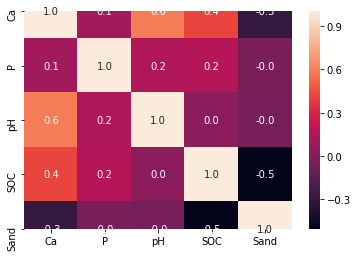

In [49]:
corr_matrix = df[target_columns].corr(method='pearson')
sns.heatmap(data=corr_matrix, annot=True, fmt=".1f")

Uvidom u korelacije, zaključuje se da postoji zavisnost između atributa, što ukazuje na to da je potrebno, pored razvijanja 5 različitih modela, probati neke od tehnike učenja višeciljne regresije. Potrebno je testirati **Hipotezu 5**: Učenje zajedničkog modela višeciljne regresije će dati bolje rezultate predviđanja.

### Priprema podataka

#### Hipoteza 1: Uklanjanje spektra m2379.76-m2352.76 neće smanjiti tačnost modela. 

In [32]:
def remove_m_co2_spectar(absorbance_measured_columns):
    absorbance_measured_columns_trans = [m for m in absorbance_measured_columns
                                         if (float(m.replace('m', '')) >= 2379.76
                                             or float(m.replace('m', '')) <= 2352.76)]
    print(f"Number of m features: {len(absorbance_measured_columns_trans)}")
    return absorbance_measured_columns_trans

#### Hipoteza 2: Skaliranje atributa će imati uticaj na poboljšanje algoritma. 

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_x(x, scaler=MinMaxScaler()):
    x_trans = scaler.fit_transform(x)
    return scaler, x_trans

In [38]:
def append_scaled_data(data_list):
    data_list_size = len(data_list)
    for i in range(data_list_size):
        data_items = data_list[i]
        data_list.append({"name": f"minmax_scaled_{data_items['name']}",
                          "x": scale_x(data_items["x"], MinMaxScaler())[1],
                          "y": data_items["y"]})
        # data_list.append({"name": f"standard_scaled_{data_items['name']}",
        #                   "x": scale_x(data_items["x"], StandardScaler())[1],
        #                   "y": data_items["y"]})
    return data_list

#### Hipoteza 3: Uklanjanje izuzetaka može pomoći izgradnji tačnijeg modela. 

In [66]:
from scipy import stats

def remove_rows_with_outlier(x, std_threshold=5):
    is_outlier = (np.abs(stats.zscore(x)) > std_threshold).any(axis=1)
    x_no_outliers = x[np.logical_not(is_outlier)]
    x_outliers = x[is_outlier]
    return x_outliers, x_no_outliers

#### Hipoteza 4: Neuključivanjem atributa sa malom varijacijom u model može se postići veća tačnost.

In [28]:
from sklearn.feature_selection import VarianceThreshold
def reduce_with_low_variance(x, variance_threshold=0.05):
    x_trans = VarianceThreshold(variance_threshold).fit_transform(x)
    print(f"Variance threshold {variance_threshold}: {x.shape[1]-x_trans.shape[1]} features removed, returning {x_trans.shape[1]} features.")
    return x_trans

#### Hipoteza 5: Učenje modela nad glavnim komponentama datih atributa povećaće se tačnost. 

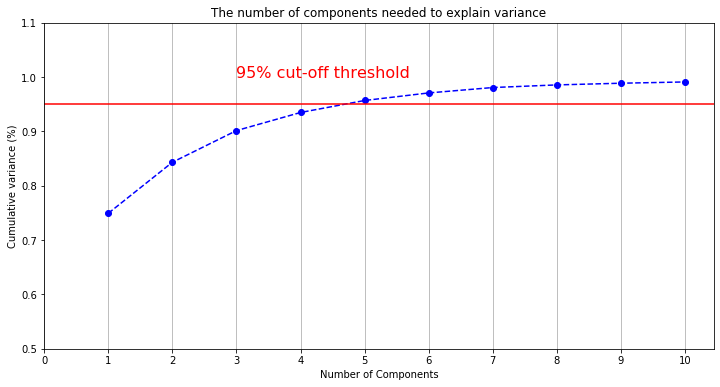

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99).fit(m_df.values)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.5,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(3, 1, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

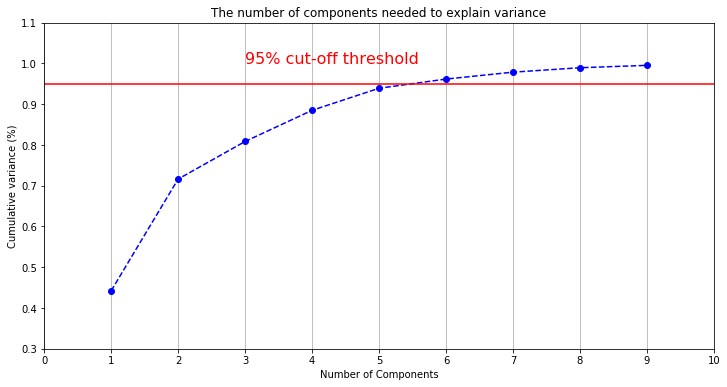

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99).fit(spatial_df.values)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.3, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(3, 1, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Vidimo da oba skupa atributa možemo objasniti sa po 5 komponenti, što bi značajno uprostilo model. Međutim, grafici su više informativnog tipa, a postavljena hipoteza se mora testirati.  

In [34]:
def transform_m_columns_pca(x, variance_threshold=0.95):
    print(f"Number of source features: {x.shape[1]}")
    pca_model = PCA(n_components=variance_threshold)
    x_trans = pca_model.fit_transform(x)
    print(f"Number of PCA components: {x_trans.shape[1]}")
    return pca_model, x_trans

### Poređenje performansi algoritma sa različitim tehnikama preprocesiranja

#### Ispitivanje hipoteza o preprocesiranju

Za početak, potrebno je testirati sva preprocesiranja implementirana ranije, kako bismo zaključili koja od njih nam mogu biti korisna. Potrebna nam je mera evaluacije. Izvor podataka na Kaeglu je postavio meru evaluacije, tako da će ona biti korišćena.

In [21]:
def mean_columnwise_root_mse_scorer(estimator, x, y):
    y_pred = estimator.predict(x)
    return np.sum((y - y_pred)**2/y.shape[0])/y.shape[1]

Takođe su potrebne pomoćne funkcije za evaluaciju. Korišćena je kros-validacija za početna testiranja.

In [22]:
def cross_validate_defined_models(data, models, n_folds=3, scoring_func='neg_mean_squared_error'):
    all_scores = pd.DataFrame()
    for model_name, model in models.items():
        scores = np.abs(cross_val_score(model, data['x'], data['y'], cv=n_folds, scoring=mean_columnwise_root_mse_scorer))
        print(f"Model {model_name}: {np.mean(scores)} +- {np.std(scores)} on {n_folds} folds.")
        all_scores = all_scores.append({
            "data_index": data['name'],
            "model": model_name,
            "n_folds": n_folds,
            "score": scoring_func,
            "score_mean": np.mean(scores),
            "score_std": np.std(scores)
        }, ignore_index=True)
    return all_scores

In [23]:
def evaluate_preprocessed_data(data_list, models, n_folds=3):
    evaluation_results = pd.DataFrame()
    for data_item in data_list:
        print(f"Evaluate on data: {data_item['name']}")
        evaluation_results = evaluation_results.append(cross_validate_defined_models(data_item, models, n_folds))
    return evaluation_results

Kako je moguće da neka preuzeta preprocesiranja pokazuju rezultate samo u kombinicaju sa nekim drugim, a da izolovanim slučajevima ne vidimo njihovu korisnost, eksperiment je postavljen tako da kombinuje veći broj njih.

In [40]:
full_x = df[measured_columns+spatial_columns+absorbance_measured_columns].values
abs_measured_columns_without_co2 = remove_m_co2_spectar(absorbance_measured_columns)
full_x_wo = df[measured_columns+abs_measured_columns_without_co2+spatial_columns]
spatial_x = df[spatial_columns]
measured_x = df[measured_columns+abs_measured_columns_without_co2]
y = df[target_columns].values

data_list = list()
spatial_x_components = transform_m_columns_pca(scale_x(spatial_x)[1], 0.95)[1]
measured_x_components = transform_m_columns_pca(scale_x(measured_x)[1], 0.95)[1]
full_x_components = transform_m_columns_pca(scale_x(full_x_wo)[1], 0.95)[1]

x_trasformed_high_var = reduce_with_low_variance(full_x_wo, 0.05)

data_list.append({"name": "full", "x": full_x, "y": y})
data_list.append({"name": "full_wo_co2", "x": full_x_wo, "y": y})
data_list.append({"name": "high_var_x", "x": x_trasformed_high_var, "y": y})
data_list.append({"name": "full_components", "x": full_x_components, "y": y})
data_list.append({"name": "spatial_comp+m", "x": np.concatenate((spatial_x_components, measured_x), axis=1), "y": y})
data_list.append({"name": "spatial+m_comp", "x": np.concatenate((spatial_x, measured_x_components), axis=1), "y": y})
data_list = append_scaled_data(data_list)
print([data['name'] for data in data_list])

Number of m features: 3565
Number of source features: 15
Number of PCA components: 7
Number of source features: 3566
Number of PCA components: 5
Number of source features: 3581
Number of PCA components: 5
Variance threshold 0.05: 2988 features removed, returning 593 features.
['full', 'full_wo_co2', 'high_var_x', 'full_components', 'spatial_comp+m', 'spatial+m_comp', 'minmax_scaled_full', 'minmax_scaled_full_wo_co2', 'minmax_scaled_high_var_x', 'minmax_scaled_full_components', 'minmax_scaled_spatial_comp+m', 'minmax_scaled_spatial+m_comp']


#### Inicijalizacija osnovnih modela

Za početak, inicijalizaovano je par modela različitog tipa kako bi se videlo šta odgovara prirodi podataka i izazvale određene metode preprocesiranja da se pokažu korisnim. Uz to, vodi se računa da se proveri postavljena hipoteza.

#### Hipoteza 6: Učenje zajedničkog modela višeciljne regresije će dati bolje rezultate predviđanja.

*DecisionTreeRegressor* vode računa o povezanosti atributa tako što se gradi jedan model za sva 5 ciljna atributa i optimizuje zajednička funkcija cilja tokom učenja.
Sa druge strane, *MultiOutputRegressor* se ponaša skroz suprotno, te uči 5 različita modela za svaku ciljnu varijablu, tj. ponaša sa kao wrapper koji nam omogućava da radimo sa multi-target problemima. *Knn i linearni modeli* su po dizajnu implementirani tako da rade kao MultiOutputRegressor. *RegressorChain* vodi računa o povezanosti tako što svaki naredni model uči nad svim atributima i nad predikcijama prošlog.

['Ca', 'P', 'pH', 'SOC', 'Sand']
Ca      1.818488
P       1.388909
pH      1.718532
SOC     1.103701
Sand    0.133785
dtype: float64


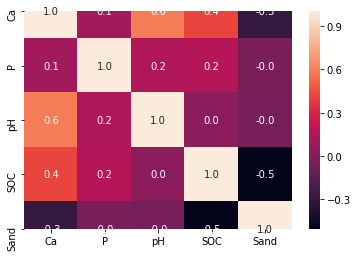

In [52]:
print(target_columns)
print(corr_matrix.sum())
sns.heatmap(data=corr_matrix, annot=True, fmt=".1f")

In [53]:
chain_order = [4, 3, 1, 2, 0]

In [42]:
estimators = {
        "K-nn": KNeighborsRegressor(),
        # "Linear regression": LinearRegression(),
#         "Ridge": Ridge(),
        # "Lasso": Lasso(),
        # "ElasticNet": ElasticNet(random_state=0),
        # "RandomForestRegressor": RandomForestRegressor(max_depth=4),
#         "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5),
        # "Extra trees": ExtraTreesRegressor(n_estimators=10, random_state=0),
        # "MultiO/P GBR": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
#         "MultiO/P AdaB": MultiOutputRegressor(AdaBoostRegressor(n_estimators=5)),
#         "RegChain K-nn": RegressorChain(KNeighborsRegressor(), order=chain_order)
    }


In [43]:
# time-consuming: use for test or load results from file
evaluation_results = evaluate_preprocessed_data(data_list, estimators, n_folds=3)
evaluation_results = evaluation_results.sort_values(by='score_mean')
print(evaluation_results)

Evaluate on data: full
Model K-nn: 0.7710865676119378 +- 0.21824423041018295 on 3 folds.
Evaluate on data: full_wo_co2
Model K-nn: 0.7718878011822676 +- 0.21824503919678728 on 3 folds.
Evaluate on data: high_var_x
Model K-nn: 0.93271492874193 +- 0.26366609782207384 on 3 folds.
Evaluate on data: full_components
Model K-nn: 0.8996743629870178 +- 0.20010657764640039 on 3 folds.
Evaluate on data: spatial_comp+m
Model K-nn: 0.7167773977200254 +- 0.18980294928191385 on 3 folds.
Evaluate on data: spatial+m_comp
Model K-nn: 0.8725362001618538 +- 0.21660839296593312 on 3 folds.
Evaluate on data: minmax_scaled_full
Model K-nn: 0.7160897392193876 +- 0.2042786873193251 on 3 folds.
Evaluate on data: minmax_scaled_full_wo_co2
Model K-nn: 0.7145551616775597 +- 0.20444722522790892 on 3 folds.
Evaluate on data: minmax_scaled_high_var_x
Model K-nn: 0.841655597387431 +- 0.19528484972208207 on 3 folds.
Evaluate on data: minmax_scaled_full_components
Model K-nn: 0.8684323795144314 +- 0.0792322826601531 on 

In [44]:
evaluation_results = pd.read_csv('results/evaluation_base_preprocessing_label_2020-06-28-18-25.csv')
evaluation_results

,data_index,model,n_folds,score,score_mean,score_std
0,minmax_scaled_spatial_comp+m,Ridge,3.0,neg_mean_squared_error,0.470307,0.051495
1,spatial_comp+m,Ridge,3.0,neg_mean_squared_error,0.477237,0.049049
2,minmax_scaled_full,Ridge,3.0,neg_mean_squared_error,0.479537,0.046766
3,minmax_scaled_full_wo_co2,Ridge,3.0,neg_mean_squared_error,0.479785,0.047224
4,full,Ridge,3.0,neg_mean_squared_error,0.506889,0.051874
5,full_wo_co2,Ridge,3.0,neg_mean_squared_error,0.507177,0.051993
6,minmax_scaled_high_var_x,Ridge,3.0,neg_mean_squared_error,0.645854,0.049477
7,high_var_x,Ridge,3.0,neg_mean_squared_error,0.663554,0.063768
8,spatial_comp+m,K-nn,3.0,neg_mean_squared_error,0.711949,0.187709
9,minmax_scaled_full_wo_co2,K-nn,3.0,neg_mean_squared_error,0.714555,0.204447


In [69]:
removed_outliers_evaluation_results = pd.read_csv('results/evaluation_base_preprocessing_no_outliers_label_2020-06-28-20-31.csv')
removed_outliers_evaluation_results

,data_index,model,n_folds,score,score_mean,score_std
0,minmax_scaled_spatial_comp+m,Ridge,3.0,neg_mean_squared_error,0.280199,0.023323
1,minmax_scaled_full,Ridge,3.0,neg_mean_squared_error,0.280429,0.025242
2,minmax_scaled_full_wo_co2,Ridge,3.0,neg_mean_squared_error,0.281013,0.024947
3,spatial_comp+m,Ridge,3.0,neg_mean_squared_error,0.287995,0.024191
4,full,Ridge,3.0,neg_mean_squared_error,0.300905,0.036073
5,full_wo_co2,Ridge,3.0,neg_mean_squared_error,0.301555,0.035774
6,minmax_scaled_high_var_x,Ridge,3.0,neg_mean_squared_error,0.449528,0.013400
7,minmax_scaled_full_components,Ridge,3.0,neg_mean_squared_error,0.466561,0.069352
8,high_var_x,Ridge,3.0,neg_mean_squared_error,0.468846,0.034305
9,minmax_scaled_spatial_comp+m,MultiO/P AdaB,3.0,neg_mean_squared_error,0.471580,0.065244


#### Evaluacija hipoteza

Na osnovu prvih rezultata mogu se evaluirati postavljene hipoteze preprocesiranja:

- Hipoteza 1: Uklanjanje spektra m2379.76-m2352.76 neće smanjiti tačnost modela. - **Prihvaćena**. Kod Ridge modela, tačnosti *full* i *full_wo* modela se neznatno razlikuju, kod KNNa i Ade nad *full_wo* je postignut malo bolji rezultat.
- Hipotezu 2: Skaliranje atributa će imati uticaj na poboljšanje algoritma. **Prihvaćena za sada**. Kod skoro svakog tipa modela skaliranjem su se postigli bolji rezultati (uzeti u obzir da je svaki "comp" set zapravo skaliran pre učenja komponenata. Ipak podaci su skalirani pre kros-validacije i time je informacija o raspodeli podataka ugrađena u scaler. Potrebno je testirati više tipa skalera naučenih isključivo na treningu kako bi se ova pretpostavka stvarno potvrdila.
- Hipoteza 3: Uklanjanje izuzetaka može pomoći izgradnji tačnijeg modela. **Prihvaćena za sada** S obbzirom da su najbolji modeli, veoma osetljivi na izuzetke, isključivanje samo oko 30 observacija, dobili smo značajno povećanu tačnost. Međutim, oni su izbačeni pre kros-validacije, pa su pri evaluaciji ostali samo podaci koje je lakše predvideti. Potrebno je proveriti ovu hipotezu nad odvojenim treningom od testa.
- Hipotezu 4: Neuključivanjem atributa sa malom varijacijom u model može se postići veća tačnost. **Odbačena** U svakom tipu osim u tree modelima (koji su generalno manje tačnosti) modeli izgrađeni na ovakvim podacima su se pokazali kao jedni od najgorih.
- Hipoteza 5: Učenje modela nad glavnim komponentama datih atributa povećaće se tačnost. **Prihvaćena** Pokazalo se korisnim predstavljanje prostornih indeksa kroz glavne komponente, dok ne treba učiti nad komponentama izmerenih osobina ili celog skupa atributa.
- Hipoteza 6: Učenje zajedničkog modela višeciljne regresije će dati bolje rezultate predviđanja. **Odbačena za sada** Tree modeli koji rade ovako su se pokazali veoma loše. Međutim, s obzirom da i Multi AdaBoost daje lošije rezultate, nećemo odbaciti skroz ovu hipotezu, već ćemo je testirati i na drugim modelima koji ne pripadaju grupi tree modela. Knn RegChain potvrđuje slično, malo je slabiji od običnog Knn-a.

In [70]:
scaling_results = pd.read_csv('results/crossval_on_train_preprocessed_2020-06-28-22-06.csv')
scaling_results

,data_index,model,n_folds,score,score_mean,score_std
0,minmax_scaled_preprocessed,Ridge,3.0,neg_mean_squared_error,0.471081,0.045432
1,preprocessed,Ridge,3.0,neg_mean_squared_error,0.501120,0.051010
2,standard_scaled_preprocessed,Ridge,3.0,neg_mean_squared_error,0.566372,0.001275
3,minmax_scaled_preprocessed,K-nn,3.0,neg_mean_squared_error,0.700805,0.191767
4,standard_scaled_preprocessed,RegChain K-nn,3.0,neg_mean_squared_error,0.701186,0.181139
5,standard_scaled_preprocessed,K-nn,3.0,neg_mean_squared_error,0.703826,0.181290
6,minmax_scaled_preprocessed,RegChain K-nn,3.0,neg_mean_squared_error,0.707390,0.195765
7,preprocessed,RegChain K-nn,3.0,neg_mean_squared_error,0.801099,0.226648
8,preprocessed,K-nn,3.0,neg_mean_squared_error,0.808671,0.221208
9,minmax_scaled_preprocessed,MultiO/P AdaB,3.0,neg_mean_squared_error,0.844317,0.139689


Implementirana je kros-validacija iz početak koja bi bila "slepa" za test skup, kako bismo potvrdili i preciznije evaluirali prilagođavanja izabranog modela.

#### Kastomizovana kros-validacija

In [76]:
def defined_cross_val_score(x, y, estimators, n_folds=3, std_threshold=None):
    estimator_scores = {estimator_name: np.array([]) for estimator_name in estimators.keys()}

    for i in range(n_folds):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        if std_threshold is not None:
            x_outliers, y_outliers, x, y = remove_rows_with_outlier(x_train, y_train, std_threshold=5)
            print(f"Outliers shape: {x_outliers.shape}")
        spatial_pca_model, x_spatial_components_train = transform_m_columns_pca(x_train[spatial_columns], 0.95)
        x_train = np.concatenate((x_spatial_components_train, x_train[measured_columns]), axis=1)

        x_spatial_components_test = spatial_pca_model.transform(x_test[spatial_columns])
        x_test = np.concatenate((x_spatial_components_test, x_test[measured_columns]), axis=1)

        for estimator_name, estimator in estimators.items():
            pipeline = Pipeline([('scaler', MinMaxScaler()), (estimator_name, estimator)])
            pipeline.fit(x_train, y_train)
            y_predicted = pipeline.predict(x_test)

            score = np.abs(mean_columnwise_root_mse_scorer(pipeline, x_test, y_test))
            print(f"{i}. iter of {estimator_name}: {score}")
            estimator_scores[estimator_name] = np.append(estimator_scores[estimator_name], score)

    mean_estimator_scores = [{"model": e_name, "mean_score": e_score.mean(),  "std_score": e_score.std()} for e_name, e_score in estimator_scores.items()]
    scores_df = pd.DataFrame(mean_estimator_scores)
    return scores_df

In [ ]:
# time-consuming, load results from file
x = df[measured_columns+spatial_columns]
y = df[target_columns].values


chain_order = [4, 3, 1, 2, 0]
estimators = {
    "K-nn": KNeighborsRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "MultiO/P AdaB": MultiOutputRegressor(AdaBoostRegressor(n_estimators=5)),
    "RegChain K-nn": RegressorChain(KNeighborsRegressor(), order=chain_order),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5),
    "Extra trees": ExtraTreesRegressor(n_estimators=10),
    "MultiO/P GBR": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5))
}
scores_df = defined_cross_val_score(x, y, estimators, n_folds=5, std_threshold=None)
scores_df = scores_df.sort_values(by='mean_score')

In [74]:
customized_cross_val_results = pd.read_csv('results/own_crossval_full_2020-06-29-06-36.csv')
customized_cross_val_results

,model,mean_score,std_score
0,Ridge,0.228567,0.015854
1,Extra trees,0.293351,0.006795
2,K-nn,0.315467,0.009430
3,RegChain K-nn,0.321467,0.022618
4,MultiO/P AdaB,0.416762,0.029480
5,RandomForestRegressor,0.431582,0.027842
6,MultiO/P GBR,0.616291,0.034299
7,Decision Tree Regressor,0.763347,0.097355
8,Lasso,1.012698,0.052946
9,ElasticNet,1.012698,0.052946


In [77]:
customized_cross_val_no_out_results = pd.read_csv('results/own_crossval_no_outliers_2020-06-29-06-28.csv')
customized_cross_val_no_out_results

,model,mean_score,std_score
0,Ridge,0.219254,0.030405
1,K-nn,0.315283,0.007548
2,RegChain K-nn,0.321013,0.021559
3,Extra trees,0.353801,0.068098
4,MultiO/P AdaB,0.404881,0.037926
5,RandomForestRegressor,0.415001,0.037760
6,MultiO/P GBR,0.559989,0.073524
7,Decision Tree Regressor,0.623376,0.201342
8,Lasso,0.877762,0.153686
9,ElasticNet,0.877762,0.153686


### Podešavanje parametara algoritma